<a href="https://colab.research.google.com/github/Martim-21805485/IASolucoes/blob/main/Lab7_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 7
> Search Algorithms

## Purpose
Study Uninformed Search Algorithms.

## Methodology
Implementation of Iterative Depth First Search.

## Setup

### Library import

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

## Data import
We retrieve all the required data for the analysis.

In [ ]:
edges = [('A', 'B'),
     ('B', 'C'),
     ('B', 'E'),
     ('B', 'F'),
     ('C', 'A'),
     ('C', 'D'),
     ('C', 'F'),
     ('D', 'F'),
     ('D', 'G'),
     ('G', 'H')
    ]

In [ ]:
edges

[('A', 'B'),
 ('B', 'C'),
 ('B', 'E'),
 ('B', 'F'),
 ('C', 'A'),
 ('C', 'D'),
 ('C', 'F'),
 ('D', 'F'),
 ('D', 'G'),
 ('G', 'H')]

## Data processing

In [ ]:
G = pd.DataFrame(edges, columns=['In', 'Out'])
G['Weight'] = 1
G

,In,Out,Weight
0,A,B,1
1,B,C,1
2,B,E,1
3,B,F,1
4,C,A,1
5,C,D,1
6,C,F,1
7,D,F,1
8,D,G,1
9,G,H,1


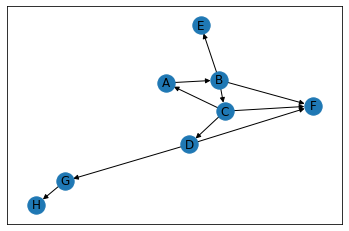

In [ ]:
import networkx as nx

nG = nx.from_pandas_edgelist(G, source='In', target='Out', edge_attr='Weight', create_using=nx.DiGraph)
nx.draw_networkx(nG)

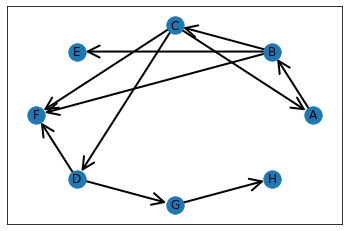

In [ ]:
options = {
    'width': 2,
    'arrowstyle': '->',
    'arrowsize': 30,
}
pos = nx.circular_layout(nG)   
nx.draw_networkx(nG, pos, with_labels = True, 
                 edge_color = 'black', arrows=True, **options)

If you want to look at more networks' visualization libraries in Python you can start at [link](https://towardsdatascience.com/visualizing-networks-in-python-d70f4cbeb259)

In [ ]:
G

,In,Out,Weight
0,A,B,1
1,B,C,1
2,B,E,1
3,B,F,1
4,C,A,1
5,C,D,1
6,C,F,1
7,D,F,1
8,D,G,1
9,G,H,1


In [ ]:
G.groupby('In').apply(lambda x: list(x['Out']))

In
A          [B]
B    [C, E, F]
C    [A, D, F]
D       [F, G]
G          [H]
dtype: object

In [ ]:
graph = G.groupby('In').apply(lambda x: list(x['Out'])).to_dict()
graph

{'A': ['B'],
 'B': ['C', 'E', 'F'],
 'C': ['A', 'D', 'F'],
 'D': ['F', 'G'],
 'G': ['H']}

## Uninformed Search

### Iterative Depth First Search

Using last Lab functions, create a new function to perform an uninformed search using Depth First Search with a small tweak. We will only allow the algorithm to explore an `x` amount of nodes. We should be able to pass the value of `x` as an argument to the function.

Think on the reasons why this strategy may be sometimes helpful for later discussion.

In [ ]:
class Stack:

    def __init__(self):
        self.stack = []
                    
    def append(self, item):
        self.stack.append(item)

    def pop(self):
        return self.stack.pop()
    
    def size(self):
        return len(self.stack)
    
    def __str__(self):
        return str(self.stack)
    
def uninformed_search_path_visitors(graph: dict, 
                                    struct, 
                                    init: str, 
                                    goal: str, 
                                    max_depth : int ### our threshold 
                                    verbose:bool=False):
    """

    """

    # keep path from the start
    path = ()
    out = init
    struct.append((out, path))

    # auxiliar - iteration counter
    i = 0

    while struct.size():

        # add iteration
        i += 1

        head = struct.pop()
        
        current_node = head[0]
        path = head[1]
        
        if verbose:
            # Show the queue
            print('Iteration {}'.format(i))
            print('Current Node: {}\nHead :{}\nQueue :{}\nSize: {}'.format(current_node,
                                                                           head,
                                                                           struct,
                                                                           struct.size()))

        if current_node == goal:
            print('################### Found {}\n# Path: {}'.format(goal, path))
            yield path + (current_node,)

        else:
            # We can check if we reached the max depth we allow to explore
            reached_max_depth = len(path) == (max_depth - 1)
            
            # And terminate the search throught this path if it reaches the limit
            # Or again, if the node is terminal
            if current_node not in graph or reached_max_depth:
                continue
            else:
                new_path = path + (current_node,)

                possible_paths = [(out, new_path)
                                  for out in graph[current_node] if out not in new_path]
                
                for p in possible_paths:
                        struct.append(p)